# Base de Datos: Cáncer de Mama
El conjunto de datos contiene características de imágenes digitalizadas de biopsias de mama y tiene 30 características que describen cada célula. Nuestro objetivo será agrupar los tumores en dos clusters (benigno y maligno) utilizando K-Means.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

#Cargar el conjunto de datos de cáncer de mama
cancer = load_breast_cancer()
X = cancer.data  #Características (30 características de las células)
y = cancer.target  #Etiquetas (0 = Benigno, 1 = Maligno)

#Convertir los datos en un DataFrame para mejor visualización
data = pd.DataFrame(X, columns=cancer.feature_names)

#Mostrar las primeras filas del conjunto de datos
print(data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

#Preprocesamiento de los datos
Para asegurarnos de que el algoritmo K-Means funcione bien, es importante normalizar los datos. Esto garantiza que cada característica tenga la misma escala.

In [3]:
#Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Mostrar las primeras filas después de la normalización
print(pd.DataFrame(X_scaled, columns=cancer.feature_names).head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

#Aplicar K-Means
Ahora, vamos a aplicar el algoritmo K-Means. Como tenemos 2 clases en nuestro conjunto de datos (benigno y maligno), intentaremos encontrar 2 clusters.

In [4]:
#Inicializar y ajustar el modelo K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)  # Obtener las etiquetas de los clusters

#Mostrar los primeros 10 valores de las predicciones
print("Predicciones de los clusters:\n", clusters[:10])


Predicciones de los clusters:
 [0 0 0 0 0 0 0 0 0 0]


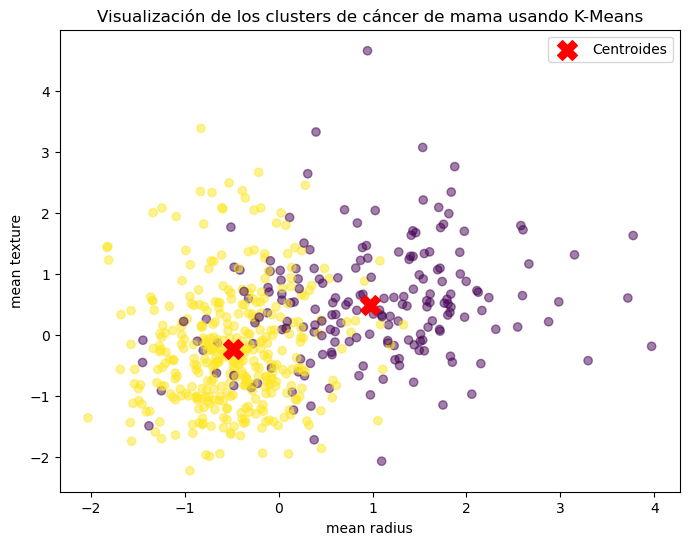

In [5]:
#Visualización de los centroides de los clusters
plt.figure(figsize=(8, 6))

#Graficar los dos primeros componentes principales
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.5)

#Plotear los centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroides")
plt.title('Visualización de los clusters de cáncer de mama usando K-Means')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend()
plt.show()


In [6]:
#Evaluar el rendimiento utilizando un informe de clasificación
print("Informe de clasificación:\n", classification_report(y, clusters))

#Matriz de confusión para ver los verdaderos positivos, negativos, etc.
cm = confusion_matrix(y, clusters)
print("Matriz de confusión:\n", cm)

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.93      0.83      0.87       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569

Matriz de confusión:
 [[175  37]
 [ 14 343]]
